# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [196]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec, FastText
from sklearn.preprocessing import OneHotEncoder


## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [197]:
spam = pd.read_csv('spam.csv')

In [198]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [199]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Tokenizing


In [200]:
import nltk

In [201]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dksu4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dksu4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [202]:
# 전처리 함수
def preprocess(text):
    # 소문자로 변환합니다.
    text = text.lower()
    
    # 특수문자를 제거합니다.
    text = re.sub(r'[^\w\s]', '', text)
    
    # 숫자를 제거합니다.
    text = re.sub(r'\d+', '', text)
    
    # stop word를 제거합니다.
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if not token in stop_words]
    
    # 영어 이외의 문자를 제거합니다.
    tokens = [token for token in tokens if token.isalpha()]
    
    # 처리된 결과를 반환합니다.
    return ' '.join(tokens)

spam['filtered_text'] = spam['v2'].apply(preprocess)

In [203]:
spam

,v1,v2,filtered_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u å pound prize claim ...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


v2 열의 각 행마다 token들을 `filtered_text` 행에 담았음.

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [204]:
# One-hot encoding을 수행합니다.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
onehot = vectorizer.fit_transform(spam['filtered_text'])

# CBOW 모델을 학습시킵니다.
from gensim.models import Word2Vec
cbow_model = Word2Vec(spam['filtered_text'].apply(word_tokenize), min_count=1, vector_size=100, window=5)

# Skip-gram 모델을 학습시킵니다.
skipgram_model = Word2Vec(spam['filtered_text'].apply(word_tokenize), min_count=1, vector_size=100, window=5, sg=1)

# FastText 모델을 학습시킵니다.
from gensim.models import FastText
fasttext_model = FastText(spam['filtered_text'].apply(word_tokenize), min_count=1, vector_size=100, window=5, sg=1)

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [205]:
# 각 모델의 결과
print(cbow_model.wv.most_similar('money'))
print()
print()

print(skipgram_model.wv.most_similar('spam'))
print()
print()

print(fasttext_model.wv.most_similar('spam'))

[('u', 0.9994207620620728), ('get', 0.9994191527366638), ('got', 0.9993820190429688), ('take', 0.999372661113739), ('ltgt', 0.9993717074394226), ('go', 0.9993629455566406), ('n', 0.9993507862091064), ('cos', 0.999342679977417), ('dont', 0.9993404746055603), ('today', 0.999337911605835)]


[('regular', 0.977469801902771), ('students', 0.9773696064949036), ('power', 0.9770422577857971), ('avent', 0.9770157933235168), ('cuz', 0.9769976139068604), ('bishan', 0.9769876599311829), ('sister', 0.9766867160797119), ('enuff', 0.9766600728034973), ('book', 0.9765071868896484), ('body', 0.9764713644981384)]


[('beers', 0.9999256730079651), ('spoilt', 0.9999251365661621), ('suckers', 0.9999169111251831), ('split', 0.9999154806137085), ('munsters', 0.9999151229858398), ('spoil', 0.999913215637207), ('eastenders', 0.9999125003814697), ('slippers', 0.9999111890792847), ('knickers', 0.999910295009613), ('sponsors', 0.9999085068702698)]


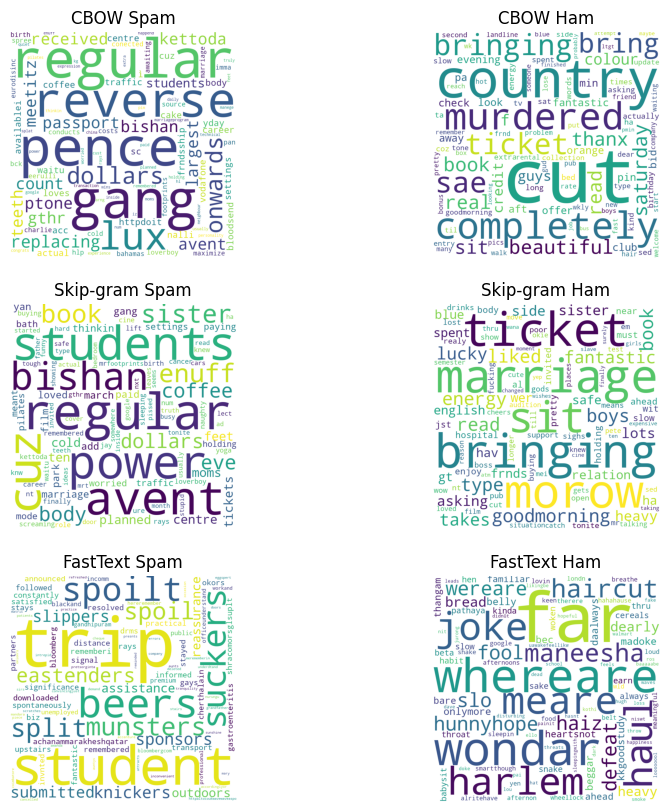

In [206]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 각 모델에서 ham과 spam과 관련된 단어들을 추출
cbow_spam_words = [word for word, _ in cbow_model.wv.most_similar('spam', topn=100)]
cbow_ham_words = [word for word, _ in cbow_model.wv.most_similar('ham', topn=100)]
skipgram_spam_words = [word for word, _ in skipgram_model.wv.most_similar('spam', topn=100)]
skipgram_ham_words = [word for word, _ in skipgram_model.wv.most_similar('ham', topn=100)]
fasttext_spam_words = [word for word, _ in fasttext_model.wv.most_similar('spam', topn=100)]
fasttext_ham_words = [word for word, _ in fasttext_model.wv.most_similar('ham', topn=100)]

# 각 모델별로 Wordcloud를 시각화
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(cbow_spam_words))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('CBOW Spam')

plt.subplot(3, 2, 2)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(cbow_ham_words))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('CBOW Ham')

plt.subplot(3, 2, 3)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(skipgram_spam_words))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Skip-gram Spam')

plt.subplot(3, 2, 4)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(skipgram_ham_words))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Skip-gram Ham')

plt.subplot(3, 2, 5)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(fasttext_spam_words))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('FastText Spam')

plt.subplot(3, 2, 6)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(fasttext_ham_words))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('FastText Ham')

plt.show()
